<a href="https://colab.research.google.com/github/gunayyy21/Python-Projects/blob/main/Monty%20hall's%20problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monty Hall's problem
You may have heard the famous american tv show "let's make a deal" hosted by Monty Hall.
If you're unfamiliar with the tv show, it's simply a tv show that lets you win a car if you can open the right door out of three.

At first, contestants randomly select one of three doors. Afterwards, Monty Hall opens one of two doors that weren't chosen and happened to not lead to the car,the prize. Then, contestants are given a choice of whether staying with their previously chosen door or go for the other closed door.

Now, the question is whether the contestant should pick the other door or stay with his/her old door. Many people would claim that, it's 50% chance for each door and hence the choice of changing the door neither decreases or increases the chances of winning the prize.
However, it's shown by many mathemeticians that changing the door doubles the chances of winning the prize.
In this notebook, I'll try to check whether we can simulate it on Python.

# Importing the libraries

In [1]:
import matplotlib.pyplot as plt #for drawing a graph
import random # To select a random door

# Defining a montyHall function
montyHall function will take the number of trials we want it to test and return the number of times the contestant would win if the door was changed or not changed.


In [2]:
from numpy import number
def montyHall(num_of_trial, number_of_doors=3):
  '''
  num_of_trial: how many times the program will run the experiment
  number_of_doors: how many doors are present in contestant

  contestant opens all the doors except one of unpicked and the door contestant picked
  return value: the number of times changing the door caused victory , and the number of times staying at the door made winning.
  '''
  win_count_unchanged = 0 #Number of times the contestant won and stayed at the door
  win_count_changed = 0 # number of times the contestant won by changing the door previously selected 
  for i in range(number_of_trials):
      doors = [0] *number_of_doors# 0 means the door isn't opened yet.
                                  # -1 the door is open and there is no prize inside
                                  # 1 means there is a car behind the door ,door may be open or close
      doors[random.randint(0, number_of_doors-1)] = 1 # Car is put behind a random door
      # contestant selects a door randomly
      selected_door = random.randint(0,number_of_doors-1)
      
      # Host opens all the doors door that doesn't have a car inside and also is not picked by you
      while True:
          to_be_opened = random.randint(0,number_of_doors-1) # select the door to be opened by showmaker
          if doors[to_be_opened] == 0 and to_be_opened is not selected_door:
            # if the door is not opened and the selected door doesn't happen to be the same door as the contestant chose
              doors[to_be_opened] = -1 # A door that doesn't hold a prize inside has opened
              break
      if doors[selected_door] == 1: # if the previously chosen door is winner
          win_count_unchanged += 1 # Win the car by not changing the door

      for i in range(len(doors)):
        if doors[i] == -1:
          continue # don't open a door that's already open
        if (i == selected_door):
          continue # don't open the selected door
        if doors[i] != 0:
          win_count_changed+=1
        
  return (win_count_changed, win_count_unchanged)

In [3]:
probabilities = []
trials = []
for number_of_trials in range(10,3000,10):
  result = montyHall(number_of_trials)
  prob = result[0]/(result[0]+result[1])
  trials.append(number_of_trials)
  probabilities.append(prob)

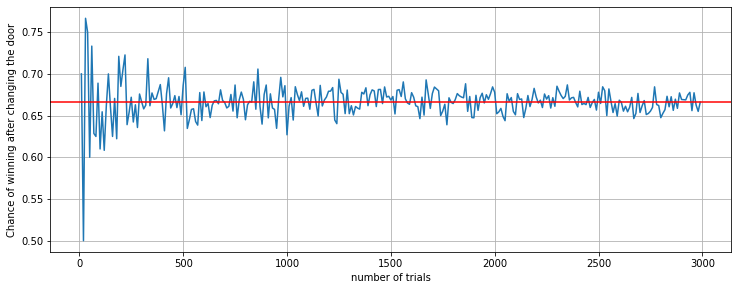

In [4]:
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot(trials, probabilities)
plt.grid()
plt.xlabel("number of trials")
plt.ylabel("Chance of winning after changing the door")
plt.axhline(y = 2/3,color="red")
plt.show()

# What happens if the number of doors is increased
Let's also test what happens if we increase the number of doors while the showrunner still opens all the doors except our picked door and another door.
Below, I calculated the results for 10 doors.

In [5]:
probabilities = []
trials = []
for number_of_trials in range(10,3000,10):
  result = montyHall(number_of_trials,10)
  prob = result[0]/(result[0]+result[1])
  trials.append(number_of_trials)
  probabilities.append(prob)
print(result) # How many times the contestant won by changing the door as opposed to staying at the same door.

(2690, 300)


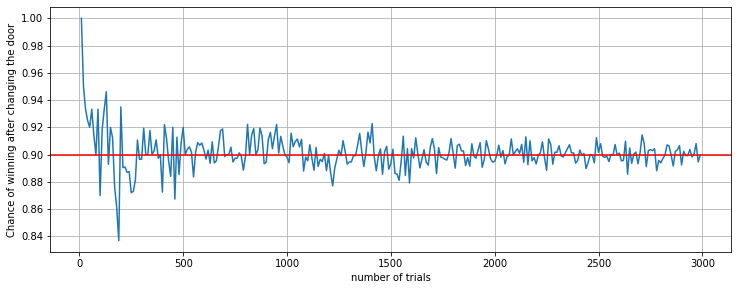

In [6]:
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot(trials, probabilities)
plt.grid()
plt.xlabel("number of trials")
plt.ylabel("Chance of winning after changing the door")
plt.axhline(y = 1-(1/10),color="red")
plt.show()

# Let's increase the number of doors even more
Now we have 100 doors in contest and showrunner opens all except 2 doors-the one we selected and one we didn't selected.

In [7]:
probabilities = []
trials = []
for number_of_trials in range(10,3000,10):
  result = montyHall(number_of_trials,100)
  prob = result[0]/(result[0]+result[1])
  trials.append(number_of_trials)
  probabilities.append(prob)
print(result) # How many times the contestant won by changing the door as opposed to staying at the same door.

(2957, 33)


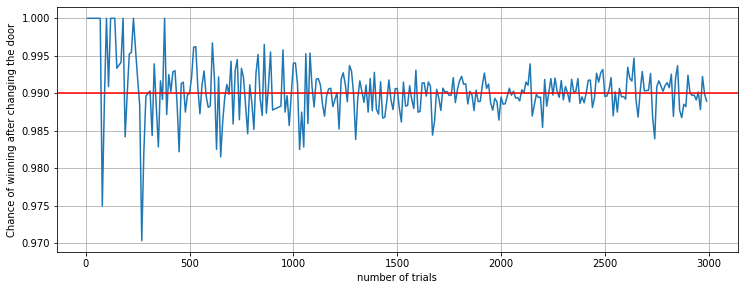

In [8]:
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot(trials, probabilities)
plt.grid()
plt.axhline(y = 1-(1/100),color="red")
plt.xlabel("number of trials")
plt.ylabel("Chance of winning after changing the door")
plt.show()

# Conclusion
Looking into the result graphs made seperably for the cases for 3,10 and 100 doors; it can be seen that as the number of trial is increased, the chance of winning by changing the door will get closer to the line 1/(number of doors)

As the number of trials is not large (left of the graphs), there will be outliers. However, as the number of trials get increased(right of the graph), the probabilities will get closer to the theoretical levels.